In [1]:
library(neonUtilities)
library(geoNEON)
library(httr)
library(jsonlite)
library(downloader)
library(raster)
options(stringsAsFactors=F)

Loading required package: sp


## 1. Download plant data (only need to do this once)
Download and stack canopy foliar & veg structure data.

In [2]:
zipsByProduct(dpID="DP1.10026.001", site="all", package="expanded", savepath="/Users/clunch/Dropbox/data")
zipsByProduct(dpID="DP1.10098.001", site="all", package="basic", savepath="/Users/clunch/Dropbox/data")

Continuing will download files totaling approximately 0.962841 MB. Do you want to proceed y/n: y
22 files downloaded to /Users/clunch/Dropbox/data/filesToStack10026
Continuing will download files totaling approximately 55.19048 MB. Do you want to proceed y/n: y
308 files downloaded to /Users/clunch/Dropbox/data/filesToStack10098


In [3]:
stackByTable("/Users/clunch/Dropbox/data/filesToStack10026", folder=T)
stackByTable("/Users/clunch/Dropbox/data/filesToStack10098", folder=T)

Unpacking zip files
  |======================================================================| 100%


Warning message in grep(labTables, filepaths):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in grep(labTables, filenames):
“argument 'pattern' has length > 1 and only the first element will be used”

Stacking table cfc_carbonNitrogen
  |======================================================================| 100%
Stacking table cfc_chemistrySubsampling
  |======================================================================| 100%
Stacking table cfc_chlorophyll
  |======================================================================| 100%
Stacking table cfc_elements
  |======================================================================| 100%
Stacking table cfc_fieldData
  |======================================================================| 100%
Stacking table cfc_lignin
  |======================================================================| 100%
Stacking table cfc_LMA
  |======================================================================| 100%
Finished: All of the data are stacked into  7  tables!
Copied the first available NEON.EcoAnalysts_Inc..cfc_chlorophyllParameters.csv to /stackedFiles
Copied the first available NEON.Brookhaven_National_Laboratory_Terrestrial_Eco

## 2. Load data
Read in C/N, lignin, and field data from cfc; read in veg mapping and subset to sites sampled for cfc.

In [2]:
cfcField <- read.delim("/Users/clunch/Dropbox/data/filesToStack10026/stackedFiles/cfc_fieldData.csv", sep=",")
cfcCN <- read.delim("/Users/clunch/Dropbox/data/filesToStack10026/stackedFiles/cfc_carbonNitrogen.csv", sep=",")
cfcLignin <- read.delim("/Users/clunch/Dropbox/data/filesToStack10026/stackedFiles/cfc_lignin.csv", sep=",")

In [3]:
cfc <- merge(cfcField, cfcCN, by=c("sampleID", "namedLocation", "domainID", "siteID", "plotID"))
cfc <- merge(cfc, cfcLignin, by=c("sampleID", "namedLocation", "domainID", "siteID", "plotID"))

In [4]:
vegmap <- read.delim("/Users/clunch/Dropbox/data/filesToStack10098/stackedFiles/vst_mappingandtagging.csv", sep=",")
vegmap <- vegmap[which(vegmap$siteID %in% unique(cfc$siteID)),]

Get precise locations of tagged individuals

In [5]:
vegmap <- def.calc.geo.os(vegmap, "vst_mappingandtagging")

  |                                                                      |   0%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_048.basePlot.vst.NA”

  |                                                                      |   1%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_057.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_057.basePlot.vst.33”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_061.basePlot.vst.NA”

  |=                                                                     |   1%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_059.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_058.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_054.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_052.basePlot.vst.NA”

  |=                                                                     |   2%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_049.basePlot.vst.NA”

  |==                                                                    |   2%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_064.basePlot.vst.NA”

  |==                                                                    |   3%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_065.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_066.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_056.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_047.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_063.basePlot.vst.NA”

  |===                                                                   |   4%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_053.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_055.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_062.basePlot.vst.NA”

  |===                                                                   |   5%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_060.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_050.basePlot.vst.NA”

  |====                                                                  |   5%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_060.basePlot.vst.42”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_050.basePlot.vst.40”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_051.basePlot.vst.NA”

  |====                                                                  |   6%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_051.basePlot.vst.258”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_006.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_019.basePlot.vst.NA”

  |=====                                                                 |   7%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_013.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_004.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_001.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_017.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_003.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_009.basePlot.vst.NA”

  |=====                                                                 |   8%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_010.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_005.basePlot.vst.NA”

  |======                                                                |   8%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_015.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_016.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_025.basePlot.vst.NA”

  |======                                                                |   9%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_011.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_018.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_002.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_008.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_007.basePlot.vst.NA”

  |=======                                                               |   9%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_014.basePlot.vst.NA”

  |=======                                                               |  10%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: GRSM_012.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: JORN_053.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: JORN_066.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: JORN_060.basePlot.vst.NA”

  |========                                                              |  12%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: JORN_008.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: JORN_016.basePlot.vst.NA”

  |=========                                                             |  12%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: JORN_012.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: JORN_015.basePlot.vst.NA”

  |=========                                                             |  13%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: JORN_054.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: JORN_050.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: JORN_042.basePlot.vst.NA”

  |===========                                                           |  16%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: JORN_055.basePlot.vst.NA”

  |============                                                          |  17%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_049.basePlot.vst.NA”

  |============                                                          |  18%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_049.basePlot.vst.50”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_059.basePlot.vst.NA”

  |=============                                                         |  18%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_067.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_046.basePlot.vst.NA”

  |=============                                                         |  19%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_063.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_050.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_053.basePlot.vst.NA”

  |==============                                                        |  19%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_069.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_061.basePlot.vst.NA”

  |==============                                                        |  20%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_064.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_065.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_056.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_055.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_054.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_070.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(da

  |==============                                                        |  21%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_060.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_048.basePlot.vst.NA”

  |===============                                                       |  21%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_045.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_044.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_042.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_068.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_051.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_043.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(da

  |==================                                                    |  26%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_025.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: KONZ_024.basePlot.vst.NA”

  |==========================                                            |  38%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: MOAB_024.basePlot.vst.NA”

  |===========================                                           |  38%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: MOAB_025.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: MOAB_003.basePlot.vst.NA”

  |===========================                                           |  39%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_036.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_037.basePlot.vst.NA”

  |============================                                          |  39%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_043.basePlot.vst.NA”

  |============================                                          |  40%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_012.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_003.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_004.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_014.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_002.basePlot.vst.NA”

  |=============================                                         |  41%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_008.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_032.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_035.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_033.basePlot.vst.NA”

  |==============================                                        |  42%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_009.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_010.basePlot.vst.NA”

  |==============================                                        |  43%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_001.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_006.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_029.basePlot.vst.NA”

  |===============================                                       |  44%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_007.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_027.basePlot.vst.NA”

  |===============================                                       |  45%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_057.basePlot.vst.NA”

  |================================                                      |  45%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_062.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_049.basePlot.vst.NA”

  |================================                                      |  46%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_055.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_046.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_061.basePlot.vst.NA”

  |=================================                                     |  46%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_058.basePlot.vst.NA”

  |=================================                                     |  47%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_051.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_050.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_052.basePlot.vst.NA”

  |=================================                                     |  48%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_045.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_059.basePlot.vst.NA”

  |==================================                                    |  48%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_063.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_056.basePlot.vst.NA”

  |==================================                                    |  49%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_053.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_054.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_060.basePlot.vst.NA”

  |===================================                                   |  49%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_021.basePlot.vst.NA”

  |===================================                                   |  50%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_031.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_044.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_066.basePlot.vst.NA”

  |===================================                                   |  51%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: ORNL_029.basePlot.vst.32”

  |=====================================                                 |  52%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_013.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_008.basePlot.vst.NA”

  |=====================================                                 |  53%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_004.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_015.basePlot.vst.NA”

  |======================================                                |  54%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_017.basePlot.vst.NA”

  |======================================                                |  55%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_007.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_018.basePlot.vst.NA”

  |=======================================                               |  56%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_016.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_003.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_011.basePlot.vst.NA”

  |========================================                              |  57%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_002.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_063.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_010.basePlot.vst.NA”

  |========================================                              |  58%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_014.basePlot.vst.NA”

  |=========================================                             |  58%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_005.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_062.basePlot.vst.NA”

  |==========================================                            |  59%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_047.basePlot.vst.NA”

  |==========================================                            |  60%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_067.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_048.basePlot.vst.NA”

  |===========================================                           |  61%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_049.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_046.basePlot.vst.NA”

  |===========================================                           |  62%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_055.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_066.basePlot.vst.NA”

  |============================================                          |  62%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_064.basePlot.vst.NA”

  |============================================                          |  63%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_045.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_058.basePlot.vst.NA”

  |============================================                          |  64%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_056.basePlot.vst.NA”

  |=============================================                         |  64%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_057.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_051.basePlot.vst.NA”

  |==============================================                        |  65%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_050.basePlot.vst.NA”

  |==============================================                        |  66%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_053.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_061.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_054.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: SCBI_052.basePlot.vst.NA”

  |================================================                      |  69%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_058.basePlot.vst.NA”

  |=================================================                     |  70%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_051.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_056.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_061.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_046.basePlot.vst.NA”

  |==================================================                    |  71%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_062.basePlot.vst.NA”

  |==================================================                    |  72%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_052.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_055.basePlot.vst.NA”

  |===================================================                   |  72%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_053.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_047.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_054.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_057.basePlot.vst.NA”

  |===================================================                   |  73%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_060.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_048.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_050.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_049.basePlot.vst.NA”

  |====================================================                  |  74%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_059.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_010.basePlot.vst.NA”

  |====================================================                  |  75%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_002.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_009.basePlot.vst.NA”

  |=====================================================                 |  75%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_007.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_012.basePlot.vst.NA”

  |=====================================================                 |  76%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_001.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_015.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_004.basePlot.vst.NA”

  |======================================================                |  77%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_016.basePlot.vst.NA”

  |======================================================                |  78%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_011.basePlot.vst.NA”

  |=======================================================               |  78%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_011.basePlot.vst.32”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_011.basePlot.vst.40”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_022.basePlot.vst.NA”

  |=======================================================               |  79%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_013.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_005.basePlot.vst.NA”

  |========================================================              |  79%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_008.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_008.basePlot.vst.32”

  |========================================================              |  80%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_008.basePlot.vst.40”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_021.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_014.basePlot.vst.NA”

  |=========================================================             |  81%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_006.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_003.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_017.basePlot.vst.NA”

  |==========================================================            |  82%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_019.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: STEI_019.basePlot.vst.1”

  |===========================================================           |  84%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_003.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_009.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_012.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_005.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_004.basePlot.vst.NA”

  |===========================================================           |  85%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_010.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_007.basePlot.vst.NA”

  |============================================================          |  85%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_002.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_015.basePlot.vst.NA”

  |============================================================          |  86%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_022.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_016.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_011.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_018.basePlot.vst.NA”

  |=============================================================         |  86%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_006.basePlot.vst.NA”

  |=============================================================         |  87%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_013.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_001.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_017.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_020.basePlot.vst.NA”

  |=============================================================         |  88%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_008.basePlot.vst.NA”

  |==============================================================        |  88%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_050.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_051.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_054.basePlot.vst.NA”

  |==============================================================        |  89%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_055.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_061.basePlot.vst.NA”

  |===============================================================       |  90%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_058.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_056.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_057.basePlot.vst.NA”

  |================================================================      |  91%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_049.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_052.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_053.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_059.basePlot.vst.NA”

  |=================================================================     |  93%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_046.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_047.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_048.basePlot.vst.NA”

  |==================================================================    |  94%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_060.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_045.basePlot.vst.NA”

  |===================================================================   |  95%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_044.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_043.basePlot.vst.NA”Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_042.basePlot.vst.NA”

  |====================================================================  |  97%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: TALL_064.basePlot.vst.NA”

  |======================================================================| 100%

Warning message in geoNEON::def.extr.geo.os(data, locCol = locCol, locOnly = F):
“WARNING: the following namedLocation was not found: WOOD_008.basePlot.vst.NA”

Warning message in def.calc.latlong(point.loc):
“one or more rows had missing inputs for easting, northing, or UTM zone and were not converted”

Merge cfc and vst data

In [6]:
cfc <- cfc[,which(names(cfc) %in% c("sampleID", "namedLocation", "domainID", "siteID", "plotID", "subplotID", 
                                    "collectDate", "tagID", "individualID", "taxonID", "clipCellNumber", "clipID", 
                                    "clipLength", "clipWidth", "percentCoverClip", "nitrogenPercent", 
                                    "carbonPercent", "dryMass", "ligninPercent", "cellulosePercent"))]
cfc <- merge(cfc, vegmap, by=c("individualID", "domainID", "siteID", "plotID"))

NEED TO FIGURE OUT THE HERBACEOUS LOCATIONS

## 3. Download AOP data (only need to do this once)
Download AOP tiles matching UTMs from plant data

First figure out the AOP tiles needed to match all the sampled plants

In [53]:
cfc$tileEasting <- floor(cfc$adjEasting/1000)*1000
cfc$tileNorthing <- floor(cfc$adjNorthing/1000)*1000
utms <- data.frame(cbind(cfc$tileEasting, cfc$tileNorthing))
colnames(utms) <- c("easting", "northing")
tiles <- unique(utms)
tiles <- tiles[which(!is.na(tiles$easting) & !is.na(tiles$northing)),]

NDNI:

In [49]:
n.req <- httr::GET("http://data.neonscience.org/api/v0/products/DP3.30018.001")
avail <- jsonlite::fromJSON(httr::content(n.req, as="text"))
urls <- unlist(avail$data$siteCodes$availableDataUrls)

In [54]:
for(i in unique(cfc$siteID)) {
    print(i)
    ind <- grep(i, urls)
    if(length(ind)==0) {
        next
    }
    for(j in 1:length(ind)) {
        print(j)
        fls <- httr::GET(urls[ind[j]])
        list.files <- jsonlite::fromJSON(httr::content(fls, as="text"))
        for(k in 1:nrow(tiles)) {
            print(tiles[k,])
            if(length(intersect(intersect(grep(tiles$easting[k], list.files$data$files$name), 
                                   grep(tiles$northing[k], list.files$data$files$name)),
                         grep("NDNI", list.files$data$files$name)))>0) {
                                    downloader::download(list.files$data$files$url[intersect(intersect(grep(tiles$easting[k], 
                                                                                  list.files$data$files$name), 
                                                                             grep(tiles$northing[k], 
                                                                                  list.files$data$files$name)),
                                                                            grep("NDNI",
                                                                                list.files$data$files$name))],
                                         paste("/Users/clunch/Dropbox/data/AOP", 
                                               list.files$data$files$name[intersect(intersect(grep(tiles$easting[k], 
                                                                                  list.files$data$files$name), 
                                                                             grep(tiles$northing[k], 
                                                                                  list.files$data$files$name)),
                                                                                   grep("NDNI",
                                                                                       list.files$data$files$name))], 
                                               sep="/"))
            } else {
                next
            }
       }
    }
}

[1] "SCBI"
[1] 1
  easting northing
1  747000  4309000
  easting northing
4  746000  4309000
  easting northing
6  747000  4308000
  easting northing
8  746000  4306000
   easting northing
10  749000  4307000
   easting northing
11  748000  4307000
   easting northing
16  748000  4308000
   easting northing
46  297000  5042000
   easting northing
48  259000  5077000
   easting northing
59  259000  5076000
   easting northing
64  260000  5078000
   easting northing
67  261000  5079000
   easting northing
78  262000  5075000
   easting northing
83  262000  5076000
   easting northing
85  261000  5076000
   easting northing
92  707000  4331000
    easting northing
102  273000  3952000
    easting northing
108  273000  3951000
    easting northing
129  260000  3951000
    easting northing
141  270000  3951000
    easting northing
153  274000  3950000
    easting northing
157  276000  3950000
    easting northing
169  271000  3950000
    easting northing
185  275000  3941000
    easting nor

    easting northing
284  462000  3645000
    easting northing
288  459000  3646000
    easting northing
290  462000  3639000
    easting northing
292  460000  3648000
    easting northing
297  459000  3642000
    easting northing
300  458000  3640000
    easting northing
302  459000  3648000
    easting northing
305  457000  3638000
    easting northing
319  462000  3646000
    easting northing
332  645000  4236000
    easting northing
335  644000  4236000
    easting northing
341  330000  3608000
    easting northing
342  331000  3607000
    easting northing
345  330000  3605000
    easting northing
347  325000  3611000
    easting northing
353  328000  3609000
    easting northing
357  327000  3609000
    easting northing
360  326000  3611000
    easting northing
363  327000  3608000
    easting northing
368  328000  3607000
    easting northing
372  325000  3609000
[1] "MOAB"
[1] 1
  easting northing
1  747000  4309000
  easting northing
4  746000  4309000
  easting northing
6  747

NDLI:

In [55]:
l.req <- httr::GET("http://data.neonscience.org/api/v0/products/DP3.30022.001")
avail <- jsonlite::fromJSON(httr::content(l.req, as="text"))
urls <- unlist(avail$data$siteCodes$availableDataUrls)

In [57]:
for(i in unique(cfc$siteID)) {
    print(i)
    ind <- grep(i, urls)
    if(length(ind)==0) {
        next
    }
    for(j in 1:length(ind)) {
        print(j)
        fls <- httr::GET(urls[ind[j]])
        list.files <- jsonlite::fromJSON(httr::content(fls, as="text"))
        for(k in 1:nrow(tiles)) {
            print(tiles[k,])
            if(length(intersect(intersect(grep(tiles$easting[k], list.files$data$files$name), 
                                   grep(tiles$northing[k], list.files$data$files$name)),
                         grep("NDLI", list.files$data$files$name)))>0) {
                                    downloader::download(list.files$data$files$url[intersect(intersect(grep(tiles$easting[k], 
                                                                                  list.files$data$files$name), 
                                                                             grep(tiles$northing[k], 
                                                                                  list.files$data$files$name)),
                                                                            grep("NDLI",
                                                                                list.files$data$files$name))],
                                         paste("/Users/clunch/Dropbox/data/AOP", 
                                               list.files$data$files$name[intersect(intersect(grep(tiles$easting[k], 
                                                                                  list.files$data$files$name), 
                                                                             grep(tiles$northing[k], 
                                                                                  list.files$data$files$name)),
                                                                                   grep("NDLI",
                                                                                       list.files$data$files$name))], 
                                               sep="/"))
            } else {
                next
            }
       }
    }
}

[1] "SCBI"
[1] 1
  easting northing
1  747000  4309000
  easting northing
4  746000  4309000
  easting northing
6  747000  4308000
  easting northing
8  746000  4306000
   easting northing
10  749000  4307000
   easting northing
11  748000  4307000
   easting northing
16  748000  4308000
   easting northing
46  297000  5042000
   easting northing
48  259000  5077000
   easting northing
59  259000  5076000
   easting northing
64  260000  5078000
   easting northing
67  261000  5079000
   easting northing
78  262000  5075000
   easting northing
83  262000  5076000
   easting northing
85  261000  5076000
   easting northing
92  707000  4331000
    easting northing
102  273000  3952000
    easting northing
108  273000  3951000
    easting northing
129  260000  3951000
    easting northing
141  270000  3951000
    easting northing
153  274000  3950000
    easting northing
157  276000  3950000
    easting northing
169  271000  3950000
    easting northing
185  275000  3941000
    easting nor

    easting northing
284  462000  3645000
    easting northing
288  459000  3646000
    easting northing
290  462000  3639000
    easting northing
292  460000  3648000
    easting northing
297  459000  3642000
    easting northing
300  458000  3640000
    easting northing
302  459000  3648000
    easting northing
305  457000  3638000
    easting northing
319  462000  3646000
    easting northing
332  645000  4236000
    easting northing
335  644000  4236000
    easting northing
341  330000  3608000
    easting northing
342  331000  3607000
    easting northing
345  330000  3605000
    easting northing
347  325000  3611000
    easting northing
353  328000  3609000
    easting northing
357  327000  3609000
    easting northing
360  326000  3611000
    easting northing
363  327000  3608000
    easting northing
368  328000  3607000
    easting northing
372  325000  3609000
[1] "MOAB"
[1] 1
  easting northing
1  747000  4309000
  easting northing
4  746000  4309000
  easting northing
6  747

## 4. Load remotely sensed data

Make one merged raster per site per product. One giant raster seems like a bad idea, given differing UTM zones etc

In [8]:
files <- list.files("/Users/clunch/Dropbox/data/AOP/")
sites <- substring(files, 10, 13)
unique(sites)

[1] "SCBI" "STEI" "KONZ" "TALL"

In [9]:
tileList <- list()
for(i in 1:length(files)) {
    tileList[[i]] <- raster(paste0("/Users/clunch/Dropbox/data/AOP/", files[i]))
}

In [26]:
ind <- intersect(grep("SCBI", tileList), grep("NDNI", tileList))
scbiList <- tileList[ind]
NDNIscbi <- do.call(raster::merge, scbiList)

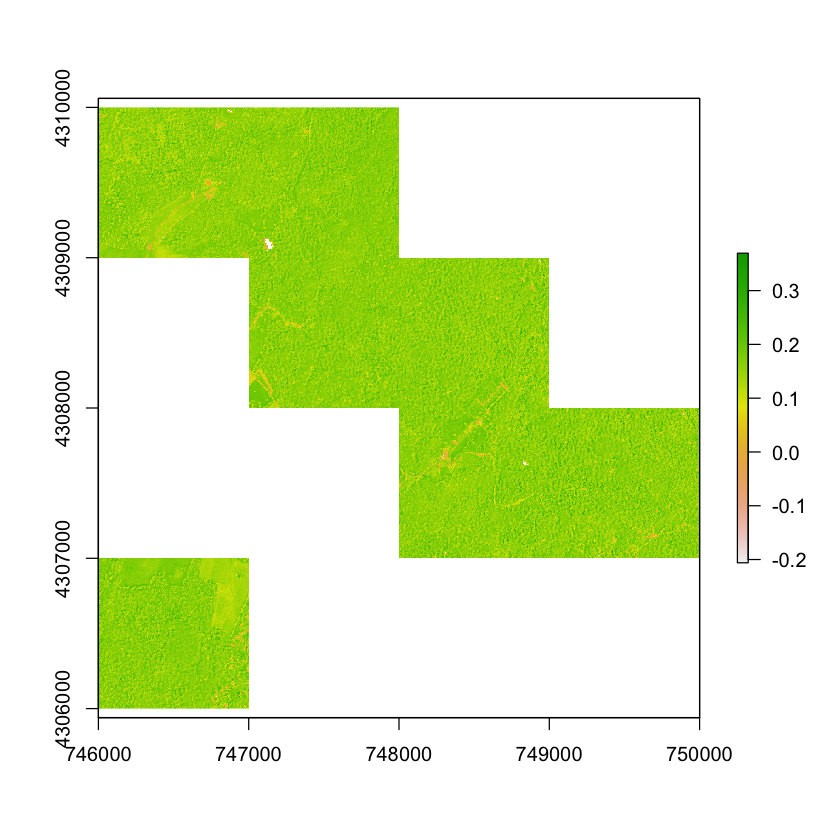

In [27]:
plot(NDNIscbi)

In [34]:
# only one tile each from STEI and KONZ
NDNIstei <- tileList[intersect(grep("STEI", tileList), grep("NDNI", tileList))]
NDNIkonz <- tileList[intersect(grep("KONZ", tileList), grep("NDNI", tileList))]


## 5. Compare indices to leaf chemistry
